In [3]:
import pandas as pd

Будем работать с датасетом по оттоку клиентов из банка  
https://www.kaggle.com/datasets/shubh0799/churn-modelling,  
но датасет из себя будет представлять две таблицы:

**Личные данные клиента**

1. CustomerId - Уникальный идентификатор клиента
2. Surname - Фамилия клиента
3. Geography - Из какой страны клиент
4. Gender - Пол клиента
5. Age - Возраст клиента
6. EstimatedSalary - Предположительная зарплата клиента

**Данные по поведению клиента в банке**

1. CustomerId - Уникальный идентификатор клиента
2. CustomerId - Уникальный идентификатор клиента
3. Tenure - Сколько лет человек является клиентом банка
4. Balance - Баланс счета
5. NumOfProducts - Количество открытых продуктов
6. HasCrCard - Есть ли у клиента кредитная карта
7. IsActiveMember - Является ли клиент активные участником
8. Exited - Уйдет ли человек в отток

In [6]:
users = pd.read_csv('users.csv', sep=',')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
users.shape

(10000, 15)

### Добавляем признаки

In [13]:
users['new_feature'] = 0
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [14]:
users.shape

(10000, 15)

In [16]:
users['Age(days)'] = users['Age'] * 365
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age(days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,14235
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,12775
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,13140
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,15330


In [17]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
new_feature                0
Age(days)              15330
Name: 0, dtype: object
____________________________________________________________
RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
new_feature                0
Age(days)        

In [18]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

In [19]:
def age_to_days(x):
    return x * 365

users['Age (days) 2'] = users['Age'].apply(age_to_days)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age(days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695


In [22]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 683.57it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

### Удаление признаков

In [25]:
users.drop(columns = 'new_feature')
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age(days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,14235,14235
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,12775,12775
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,13140,13140
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,15330,15330


In [26]:
users=users.drop(columns = 'new_feature')
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age(days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,14235,14235
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,12775,12775
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,13140,13140
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,15330,15330


In [29]:
users['new_feature'] = 0
users.drop(columns = 'new_feature', inplace=True)
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age(days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,14235,14235
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,12775,12775
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,13140,13140
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,15330,15330


### Изменение существующих признаков

##### прямое изменение - это работа в копии/части массива

In [30]:
users['target'] = 0
users[users['Geography'] == 'France']['target'] = 1

C:\Users\lilly\AppData\Local\Temp\ipykernel_5720\3028215947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


#### .loc

In [32]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age(days),Age (days) 2,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,14235,14235,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,12775,12775,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,13140,13140,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,15330,15330,0


#### .replace

In [34]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age(days),Age (days) 2,target
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,15330,15330,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,14965,14965,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,15330,15330,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,14235,14235,1
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,15695,15695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,M,39,5,0.00,2,1,0,96270.64,0,14235,14235,1
9996,9997,15569892,Johnstone,516,France,M,35,10,57369.61,1,1,1,101699.77,0,12775,12775,1
9997,9998,15584532,Liu,709,France,F,36,7,0.00,1,0,1,42085.58,1,13140,13140,1
9998,9999,15682355,Sabbatini,772,Germany,M,42,3,75075.31,2,1,0,92888.52,1,15330,15330,0


### Агрегация

In [38]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [39]:
users.agg({'Age':['min','max'],'EstimatedSalary':'mean'})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


In [40]:
users.agg(min_age = ('Age', 'min'), max_age = ('Age', 'max'), mean_sal = ('EstimatedSalary', 'mean'))

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_sal,NaN,100090.239881


### Объединение

In [46]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [47]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


In [48]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


In [44]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


In [45]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


### Методы группировок

### groupby

In [49]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [50]:
grouped = toy_df.groupby('client_id')
grouped

In [51]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [52]:
grouped.sum()

,item,price
client_id,,
1,chocolatechairbook,3256
2,cheeseham,582
3,candy,39


In [53]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [54]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


#### pivot_table

In [55]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [56]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [57]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [58]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


### crosstab

In [59]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [60]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


In [61]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


In [62]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [63]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


### Встроенные визуализации

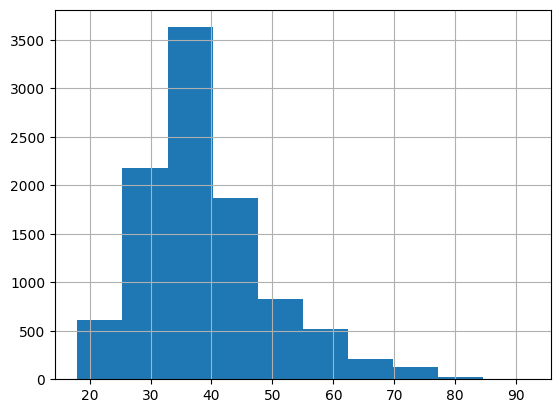

In [64]:
users['Age'].hist();

In [65]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

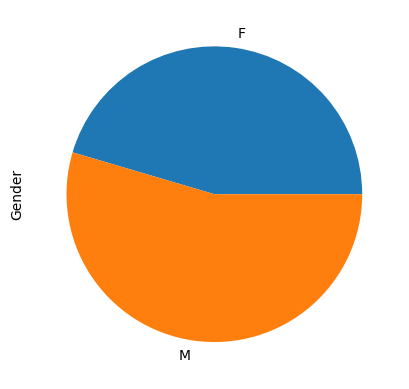

In [66]:
data.plot.pie(y='Gender');

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

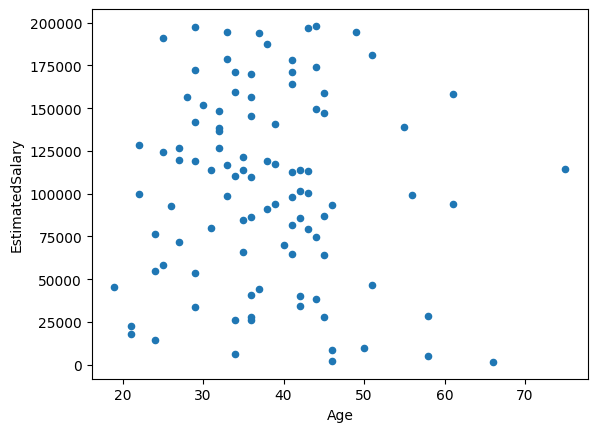

In [69]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary')

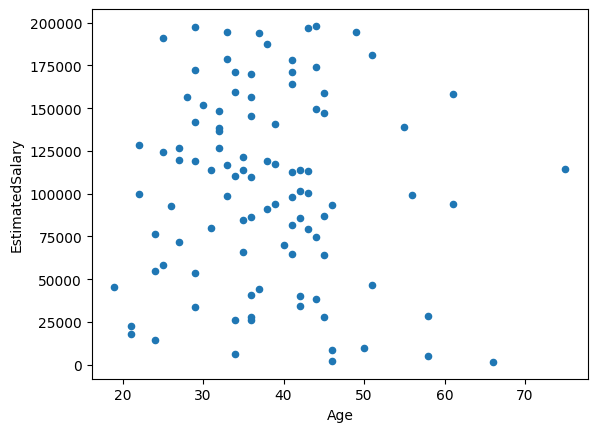

In [70]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

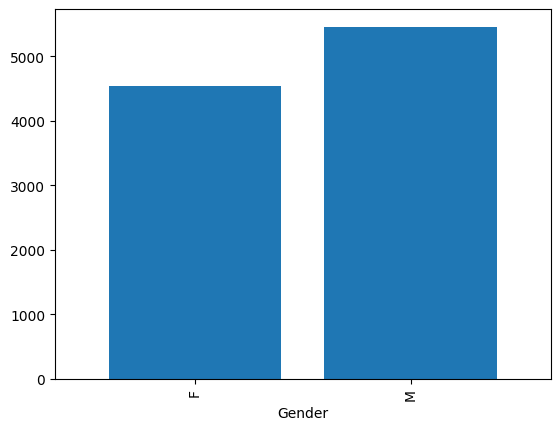

In [72]:
data.plot.bar(width=0.8);